In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # Import random forest classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
from sklearn import tree

In [11]:
validated_labels = pd.read_csv('data/test_set_seattle_decision_tree.csv')
# validated_labels['heading_diff'] = validated_labels['heading_diff'].abs()
# validated_labels['pitch_diff'] = validated_labels['pitch_diff'].abs()
validated_labels.fillna(0,  inplace=True)
len(validated_labels)
#24984 rows -> 12117 rows Wrong, 12867 rows Correct

24984

In [12]:
validated_labels.head()

,label_id,label_type,severity,gsv_panorama_id,zoom,heading,pitch,photographer_heading,photographer_pitch,user_id,lat,lng,geometry,clustered,count,false_positive,distance,tag_list,description,correct
0,9,CurbRamp,2.0,3TO1sxavsQLIliltuPh5yw,3,299.323669,-17.540178,180.368912,1.460938,e4ff325c-309b-4ea6-8555-8f973e662362,47.598358,-122.306519,POINT (-122.3065185546875 47.598358154296875),1.0,6.0,0,12.359854,1.0,0.0,1
1,12,SurfaceProblem,3.0,2zMHlmqFF6V2SHqueb1fZA,3,20.665178,-14.486608,89.751045,-1.658913,e4ff325c-309b-4ea6-8555-8f973e662362,47.598400,-122.306679,POINT (-122.30667877197266 47.5984001159668),0.0,3.0,0,1.758375,1.0,0.0,1
2,20,CurbRamp,1.0,lk95zcW0edw2sZCB1rMPTA,3,341.866058,-12.957589,106.566940,-2.300713,e4ff325c-309b-4ea6-8555-8f973e662362,47.598362,-122.309052,POINT (-122.30905151367188 47.59836196899414),1.0,6.0,0,5.536850,0.0,0.0,1
3,22,CurbRamp,1.0,hYEH3dM1ydGeOvU7l906_A,3,210.609375,-13.984375,255.282394,0.888550,e4ff325c-309b-4ea6-8555-8f973e662362,47.586857,-122.304230,POINT (-122.30422973632812 47.586856842041016),1.0,4.0,0,11.320579,0.0,0.0,1
4,23,SurfaceProblem,4.0,hYEH3dM1ydGeOvU7l906_A,2,308.345978,-34.910713,255.282394,0.888550,e4ff325c-309b-4ea6-8555-8f973e662362,47.586967,-122.304184,POINT (-122.30418395996094 47.58696746826172),0.0,4.0,0,15.889878,1.0,0.0,1


In [13]:
print((validated_labels['correct']== 1).sum())

12867


In [14]:
feature_cols = ['false_positive', 'count', 'severity', 'zoom', 'tag_list', 'distance', 'description']
X = validated_labels[feature_cols] # Features
y = validated_labels.correct # Target variable

In [15]:
# feature_cols = ['description', 'tag_list']
# X = validated_labels[feature_cols] # Features
# y = validated_labels.correct # Target variable

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # 70% training and 30% test


# clf = RandomForestClassifier(criterion="gini", n_estimators= 5, max_depth=3, max_leaf_nodes = 4).fit(X_train,y_train)


# y_pred = clf.predict(X_test)


# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# tree.plot_tree(clf[1], 
#                 feature_names=feature_cols,  
#                 class_names=True,
#                 filled=True)

In [16]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # 70% training and 30% test

# Decision Tree classifer
clf = RandomForestClassifier(criterion="gini", n_estimators= 5, max_depth=6, max_leaf_nodes = 15).fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8667466986794717


In [17]:
# Model Precision - tp / (tp + fp)
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.8012658227848102


In [18]:
validated_labels[(validated_labels['severity'] == 5) & (validated_labels['correct'] == 0)]
# print(validated_labels['pitch_diff'].mean())
# print(validated_labels['heading_diff'].median())


,label_id,label_type,severity,gsv_panorama_id,zoom,heading,pitch,photographer_heading,photographer_pitch,user_id,lat,lng,geometry,clustered,count,false_positive,distance,tag_list,description,correct
158,480,NoCurbRamp,5.0,GxlBBMmxjTeM5FZNLj7GxA,1,239.928574,-21.410715,359.932617,-2.451424,87833d72-b357-4e2c-81cd-23f58ff04c59,47.664223,-122.284882,POINT (-122.28488159179688 47.664222717285156),0.0,6.0,1,20.208203,1.0,0.0,0
160,482,NoCurbRamp,5.0,CSlZQVPLS_IjasASmHm-SQ,1,231.491074,-25.062500,0.064856,-2.452225,87833d72-b357-4e2c-81cd-23f58ff04c59,47.664215,-122.284889,POINT (-122.2848892211914 47.664215087890625),1.0,5.0,1,22.102834,1.0,0.0,0
161,483,NoCurbRamp,5.0,CSlZQVPLS_IjasASmHm-SQ,1,295.991058,-28.250000,0.064856,-2.452225,87833d72-b357-4e2c-81cd-23f58ff04c59,47.664284,-122.284912,POINT (-122.284912109375 47.664283752441406),1.0,6.0,1,27.610983,1.0,0.0,0
320,902,Obstacle,5.0,MdrWtcqInOYOyuDsLSCtQg,1,7.417411,-10.276786,141.616272,-3.220657,87833d72-b357-4e2c-81cd-23f58ff04c59,47.610374,-122.332268,POINT (-122.33226776123047 47.610374450683594),0.0,5.0,0,10.224292,0.0,1.0,0
444,1322,SurfaceProblem,5.0,ysvQH6cXiVkFw-lMyNRV1Q,2,27.839285,-26.258928,262.411560,4.752090,6d30a59f-20f8-48ed-83ed-fab476fa2398,47.704922,-122.279839,POINT (-122.27983856201172 47.70492172241211),0.0,8.0,0,19.049137,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24881,231842,NoCurbRamp,5.0,JP9zCh6NZ767F9fW30lNIg,1,134.750000,-25.250000,268.491486,2.595566,dc9c7b1a-e2bd-4e7f-9d7e-dd239d7c7062,47.697830,-122.375351,POINT (-122.37535095214844 47.69783020019531),1.0,6.0,0,18.880525,0.0,0.0,0
24883,231870,Obstacle,5.0,8poUYgPijqCWBrI-6i3a3w,1,182.392853,-26.187500,359.434937,-0.053630,dc9c7b1a-e2bd-4e7f-9d7e-dd239d7c7062,47.696354,-122.375381,POINT (-122.37538146972656 47.696353912353516),0.0,5.0,0,19.924633,0.0,0.0,0
24884,231875,NoCurbRamp,5.0,ePCf6yIjNuD1fFAoG4MDIg,1,205.830353,-23.750000,358.789276,-0.093690,dc9c7b1a-e2bd-4e7f-9d7e-dd239d7c7062,47.696163,-122.375526,POINT (-122.37552642822266 47.696163177490234),0.0,6.0,0,14.912012,0.0,0.0,0
24917,232304,NoCurbRamp,5.0,3K8aF3Yil6p6sTgEZBd7HQ,3,74.812500,-15.828125,0.303085,-1.809370,155af0a9-4149-4436-8aa3-7573e160036d,47.704704,-122.341873,POINT (-122.34187316894531 47.70470428466797),0.0,4.0,1,7.924878,0.0,0.0,0


[Text(992.96875, 1430.0, 'count <= 2.5\ngini = 0.5\nsamples = 14202\nvalue = [11026, 11459]\nclass = y[1]'),
 Text(435.9375, 1210.0, 'severity <= 0.5\ngini = 0.354\nsamples = 2009\nvalue = [2426, 724]\nclass = y[0]'),
 Text(193.75, 990.0, 'false_positive <= 0.5\ngini = 0.082\nsamples = 132\nvalue = [222, 10]\nclass = y[0]'),
 Text(96.875, 770.0, 'gini = 0.381\nsamples = 24\nvalue = [29, 10]\nclass = y[0]'),
 Text(290.625, 770.0, 'gini = 0.0\nsamples = 108\nvalue = [193, 0]\nclass = y[0]'),
 Text(678.125, 990.0, 'zoom <= 1.5\ngini = 0.37\nsamples = 1877\nvalue = [2204, 714]\nclass = y[0]'),
 Text(484.375, 770.0, 'false_positive <= 0.5\ngini = 0.3\nsamples = 1324\nvalue = [1676, 377]\nclass = y[0]'),
 Text(387.5, 550.0, 'gini = 0.301\nsamples = 290\nvalue = [82, 362]\nclass = y[1]'),
 Text(581.25, 550.0, 'gini = 0.018\nsamples = 1034\nvalue = [1594, 15]\nclass = y[0]'),
 Text(871.875, 770.0, 'false_positive <= 0.5\ngini = 0.476\nsamples = 553\nvalue = [528, 337]\nclass = y[0]'),
 Text(77

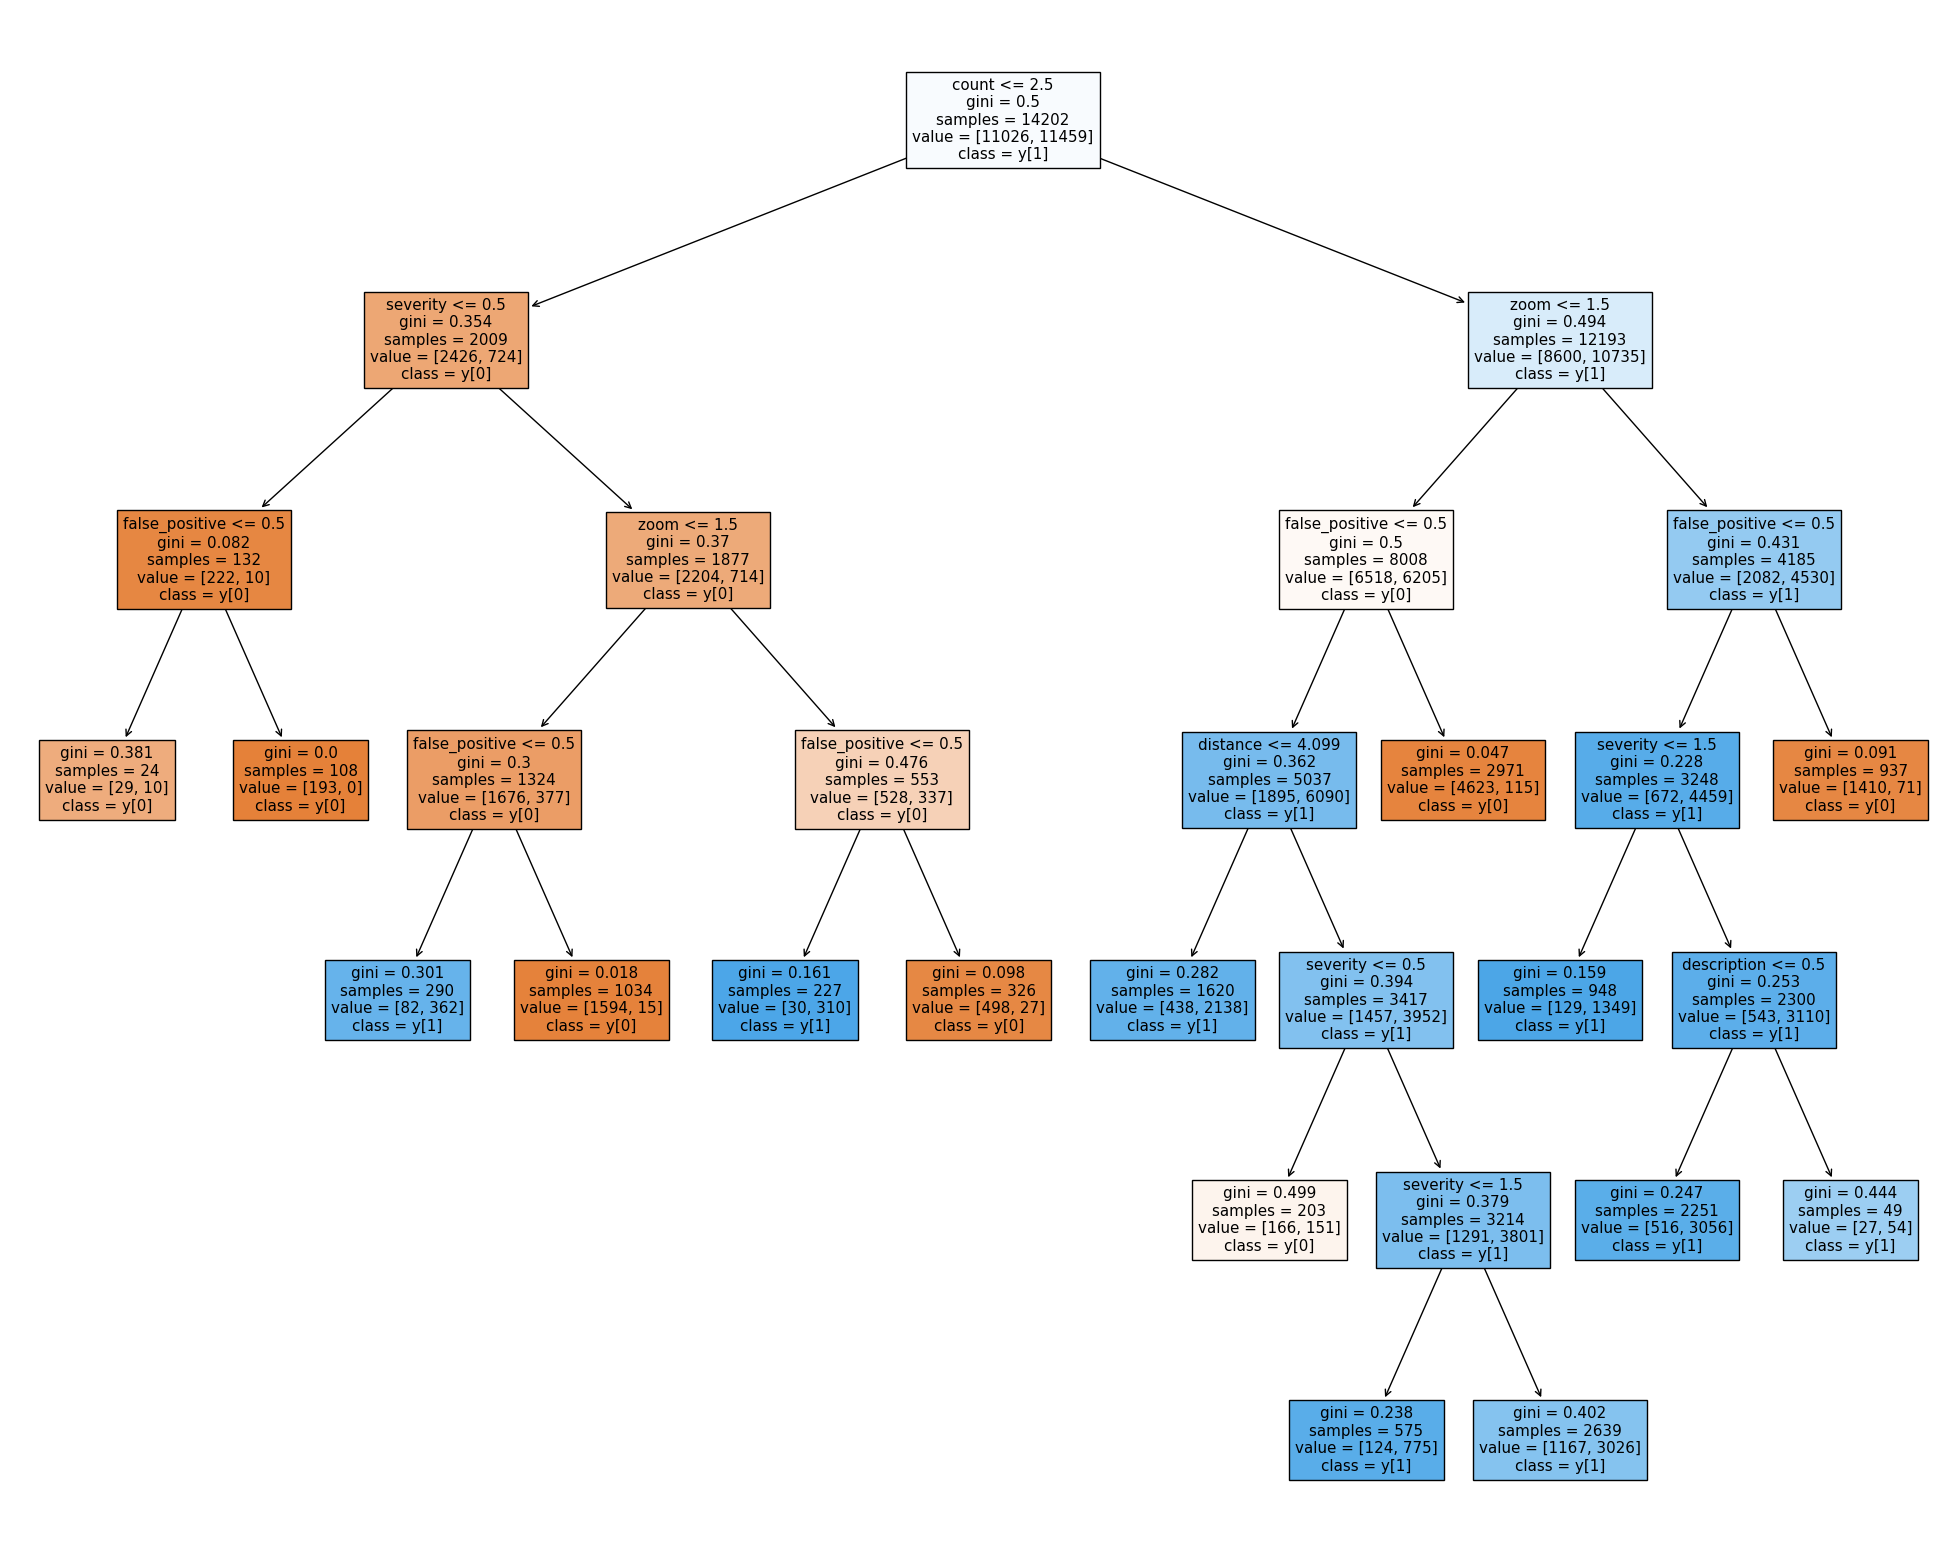

In [19]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf[0], 
                feature_names=feature_cols,  
                class_names=True,
                filled=True)

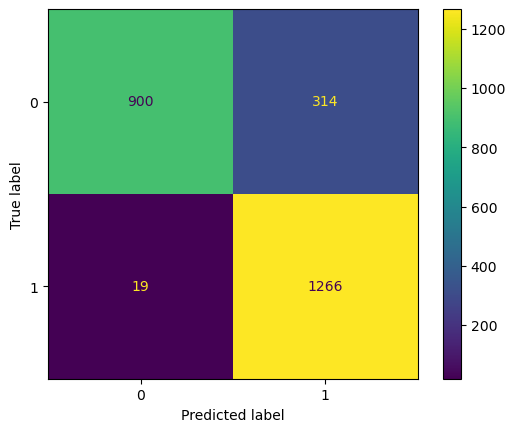

In [20]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=clf.classes_)
disp.plot()